# Part 0: Load in libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import localcider
from localcider.sequenceParameters import SequenceParameters
import re
import math
import scipy
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle
import pathlib
from matplotlib import font_manager
from scipy.stats import fisher_exact


# Setup the fonts
fonts_path = pathlib.Path.home().joinpath('fonts') # i.e. `~/fonts` (update as needed)
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)
print(font_path)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42

COLOR_MAP = dict()
COLOR_MAP['A']         = '#8c8c8c'
COLOR_MAP['CHNQST']    = '#077a15'
COLOR_MAP['DE']        = '#e23a36'
COLOR_MAP['FWY']       = '#f58220'
COLOR_MAP['G']         = '#86bd8d'
COLOR_MAP['ILMV']      = '#231f20'
COLOR_MAP['KR']        = '#1725c2'
COLOR_MAP['P']         = '#c25fc9'


# Using the global color map, we convert the colormap of amino acid
# groups, to a map against individual amino acids. This
# serves as our internal color map which is used for styling.
aacolor_map=dict()
for amino_acids in COLOR_MAP:
    for amino_acid in amino_acids:
        aacolor_map[amino_acid] = COLOR_MAP[amino_acids]

/home/research/kiersten.ruff/fonts/ARIAL.TTF


# Part 1: UBTF

## 1.1 - UBTF WT

Text(0.5, 1.0, 'UBTF')

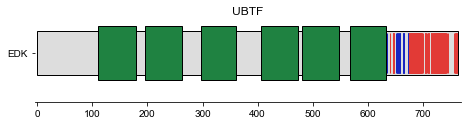

In [2]:
ubtffullseq='MNGEADCPTDLEMAAPKGQDRWSQEDMLTLLECMKNNLPSNDSSKFKTTESHMDWEKVAFKDFSGDMCKLKWVEISNEVRKFRTLTELILDAQEHVKNPYKGKKLKKHPDFPKKPLTPYFRFFMEKRAKYAKLHPEMSNLDLTKILSKKYKELPEKKKMKYIQDFQREKQEFERNLARFREDHPDLIQNAKKSDIPEKPKTPQQLWYTHEKKVYLKVRPDATTKEVKDSLGKQWSQLSDKKRLKWIHKALEQRKEYEEIMRDYIQKHPELNISEEGITKSTLTKAERQLKDKFDGRPTKPPPNSYSLYCAELMANMKDVPSTERMVLCSQQWKLLSQKEKDAYHKKCDQKKKDYEVELLRFLESLPEEEQQRVLGEEKMLNINKKQATSPASKKPAQEGGKGGSEKPKRPVSAMFIFSEEKRRQLQEERPELSESELTRLLARMWNDLSEKKKAKYKAREAALKAQSERKPGGEREERGKLPESPKRAEEIWQQSVIGDYLARFKNDRVKALKAMEMTWNNMEKKEKLMWIKKAAEDQKRYERELSEMRAPPAATNSSKKMKFQGEPKKPPMNGYQKFSQELLSNGELNHLPLKERMVEIGSRWQRISQSQKEHYKKLAEEQQKQYKVHLDLWVKSLSPQDRAAYKEYISNKRKSMTKLRGPNPKSSRTTLQSKSESEEDDEEDEDDEDEDEEEEDDENGDSSEDGGDSSESSSEDESEDGDENEEDDEDEDDDEDDDEDEDNESEGSSSSSSSSGDSSDSDSN'

hmgpos=[[112,180],[196,264],[298,362],[407,475],[482,549],[568,634]]
#idrpos=[[376,417],[451,490],[541,581],[634,764]]
idrpos=[634,764]


#myaa=['ED','K']
myaa=['EDK']

myaalist='_'
for a in range(0,len(myaa)):
    subaa=myaa[a]
    for i in range(0,len(subaa)):
        myaalist=myaalist+subaa[i]+'_'

shift=0.03

currseq=ubtffullseq

## define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(len(currseq)*0.01,1+len(myaa)/2) # may need to change 0.05 to something smaller if using long IDRs

## Plot particular amino acids
for a in range(0,len(myaa)):

    #tmp=0
    tmp=a

    #ax.plot([0, len(currseq)+1],[tmp+1, tmp+1.8],color='grey')

    #add rectangle to plot for length of full sequence
    ax.add_patch(Rectangle((0, tmp+1), len(currseq), 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    # Add domains
    for i in range(0,len(hmgpos)):
        ax.add_patch(Rectangle((hmgpos[i][0]-1, tmp+1-0.1), hmgpos[i][1]-hmgpos[i][0], 0.8+2*0.1, edgecolor = 'black', facecolor='#1f8241'))

    # Add IDR features
    posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
    for i in posaa:
        if i>=idrpos[0]-1:
            ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))


ax.set_xlim([-5, len(currseq)+5])
ax.set_ylim([0.5, tmp+2])
plt.yticks(np.arange(1+0.4,len(myaa)+1,1),myaa)
ax.spines[['left','right', 'top']].set_visible(False)
plt.title('UBTF')

#whichsequnderscore=subgenes[whichseqpos].replace(": ", "_")
#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/UBTF.pdf', transparent=True, bbox_inches = "tight")


## 1.2 - UBTF-ATXNL3

Text(0.5, 1.0, 'UBTF::ATXN7L3')

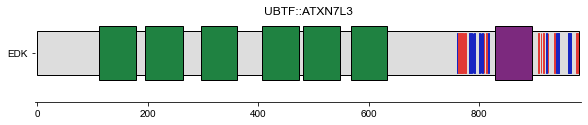

In [4]:
ubtfNterm='MNGEADCPTDLEMAAPKGQDRWSQEDMLTLLECMKNNLPSNDSSKFKTTESHMDWEKVAFKDFSGDMCKLKWVEISNEVRKFRTLTELILDAQEHVKNPYKGKKLKKHPDFPKKPLTPYFRFFMEKRAKYAKLHPEMSNLDLTKILSKKYKELPEKKKMKYIQDFQREKQEFERNLARFREDHPDLIQNAKKSDIPEKPKTPQQLWYTHEKKVYLKVRPDATTKEVKDSLGKQWSQLSDKKRLKWIHKALEQRKEYEEIMRDYIQKHPELNISEEGITKSTLTKAERQLKDKFDGRPTKPPPNSYSLYCAELMANMKDVPSTERMVLCSQQWKLLSQKEKDAYHKKCDQKKKDYEVELLRFLESLPEEEQQRVLGEEKMLNINKKQATSPASKKPAQEGGKGGSEKPKRPVSAMFIFSEEKRRQLQEERPELSESELTRLLARMWNDLSEKKKAKYKAREAALKAQSERKPGGEREERGKLPESPKRAEEIWQQSVIGDYLARFKNDRVKALKAMEMTWNNMEKKEKLMWIKKAAEDQKRYERELSEMRAPPAATNSSKKMKFQGEPKKPPMNGYQKFSQELLSNGELNHLPLKERMVEIGSRWQRISQSQKEHYKKLAEEQQKQYKVHLDLW'
atxn7l3='MKMEEMSLSGLDNSKLEAIAQEIYADLVEDSCLGFCFEVHRAVKCGYFFLDDTDPDSMKDFEIVDQPGLDIFGQVFNQWKSKECVCPNCSRSIAASRFAPHLEKCLGMGRNSSRIANRRIANSNNMNKSESDQEDNDDINDNDWSYGSEKKAKKRKSDKNPNSPRRSKSLKHKNGELSNSDPFKYNNSTGISYETLGPEELRSLLTTQCGVISEHTKKMCTRSLRCPQHTDEQRRTVRIYFLGPSAVLPEVESSLDNDSFDMTDSQALISRLQWDGSSDLSPSDSGSSKTSENQGWGLGTNSSESRKTKKKKSHLSLVGTASGLGSNKKKKPKPPAPPTPSIYDDIN'
ubtfatxn7l3fullseq=ubtfNterm+atxn7l3

sca7=[[196+len(ubtfNterm),263+len(ubtfNterm)]]
atxn7l3idr1=[106+len(ubtfNterm),192+len(ubtfNterm)]
atxn7l3idr2=[273+len(ubtfNterm),347+len(ubtfNterm)]


#myaa=['ED','K']
myaa=['EDK']
#myaa=['EDKN']
#myaa=['EDKSNQ']

myaalist='_'
for a in range(0,len(myaa)):
    subaa=myaa[a]
    for i in range(0,len(subaa)):
        myaalist=myaalist+subaa[i]+'_'

shift=0.03

currseq=ubtfatxn7l3fullseq

## define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(len(currseq)*0.01,1+len(myaa)/2) # may need to change 0.05 to something smaller if using long IDRs

## Plot particular amino acids
for a in range(0,len(myaa)):

    #tmp=0
    tmp=a

    #ax.plot([0, len(currseq)+1],[tmp+1, tmp+1.8],color='grey')

    #add rectangle to plot for length of full sequence
    ax.add_patch(Rectangle((0, tmp+1), len(currseq), 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    # Add UBTF domains
    for i in range(0,len(hmgpos)):
        ax.add_patch(Rectangle((hmgpos[i][0]-1, tmp+1-0.1), hmgpos[i][1]-hmgpos[i][0], 0.8+2*0.1, edgecolor = 'black', facecolor='#1f8241'))

    
    # Add ATXN7L3 domains
    for i in range(0,len(sca7)):
        ax.add_patch(Rectangle((sca7[i][0]-1, tmp+1-0.1), sca7[i][1]-sca7[i][0], 0.8+2*0.1, edgecolor = 'black', facecolor='#7c297e'))

    # Add IDR features
    posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
    for i in posaa:
        if i>=atxn7l3idr2[0]-1 and i <=atxn7l3idr2[1]:
            ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))
        elif i>=atxn7l3idr1[0]-1 and i <=atxn7l3idr1[1]:
            ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))


ax.set_xlim([-5, len(currseq)+5])
ax.set_ylim([0.5, tmp+2])
plt.yticks(np.arange(1+0.4,len(myaa)+1,1),myaa)
ax.spines[['left','right', 'top']].set_visible(False)
plt.title('UBTF::ATXN7L3')

#whichsequnderscore=subgenes[whichseqpos].replace(": ", "_")
#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/UBTF::ATXN7L3.pdf', transparent=True, bbox_inches = "tight")


## 1.3 - UBTF-MAML3

Text(0.5, 1.0, 'UBTF::MAML3')

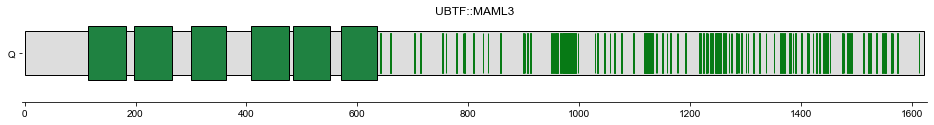

In [5]:
## maml3cterm - starts 157-1138
ubtfNterm='MDSWRMNGEADCPTDLEMAAPKGQDRWSQEDMLTLLECMKNNLPSNDSSKFKTTESHMDWEKVAFKDFSGDMCKLKWVEISNEVRKFRTLTELILDAQEHVKNPYKGKKLKKHPDFPKKPLTPYFRFFMEKRAKYAKLHPEMSNLDLTKILSKKYKELPEKKKMKYIQDFQREKQEFERNLARFREDHPDLIQNAKKSDIPEKPKTPQQLWYTHEKKVYLKVRPDATTKEVKDSLGKQWSQLSDKKRLKWIHKALEQRKEYEEIMRDYIQKHPELNISEEGITKSTLTKAERQLKDKFDGRPTKPPPNSYSLYCAELMANMKDVPSTERMVLCSQQWKLLSQKEKDAYHKKCDQKKKDYEVELLRFLESLPEEEQQRVLGEEKMLNINKKQATSPASKKPAQEGGKGGSEKPKRPVSAMFIFSEEKRRQLQEERPELSESELTRLLARMWNDLSEKKKAKYKAREAALKAQSERKPGGEREERGKLPESPKRAEEIWQQSVIGDYLARFKNDRVKALKAMEMTWNNMEKKEKLMWIKKAAEDQKRYERELSEMRAPPAATNSSKKMKFQGEPKKPPMNGYQKFSQELLSNGELNHLPLKERMVEIGSRWQRISQSQKEHYKKLAEEQQKQYKVHLDLWVK'
maml3Cterm='LQETVKRKLEGARSPLNGDQQNGACDGNFSPTSKRIRKDISAGMEAINNLPSNMPLPSASPLHQLDLKPSLPLQNSGTHTPGLLEDLSKNGRLPEIKLPVNGCSDLEDSFTILQSKDLKQEPLDDPTCIDTSETSLSNQNKLFSDINLNDQEWQELIDELANTVPEDDIQDLFNEDFEEKKEPEFSQPATETPLSQESASVKSDPSHSPFAHVSMGSPQARPSSSGPPFSTVSTATSLPSVASTPAAPNPASSPANCAVQSPQTPNQAHTPGQAPPRPGNGYLLNPAAVTVAGSASGPVAVPSSDMSPAEQLKQMAAQQQQRAKLMQQKQQQQQQQQQQQQQQQQQQQQQQQQQHSNQTSNWSPLGPPSSPYGAAFTAEKPNSPMMYPQAFNNQNPIVPPMANNLQKTTMNNYLPQNHMNMINQQPNNLGTNSLNKQHNILTYGNTKPLTHFNADLSQRMTPPVANPNKNPLMPYIQQQQQQQQQQQQQQQQQQPPPPQLQAPRAHLSEDQKRLLLMKQKGVMNQPMAYAALPSHGQEQHPVGLPRTTGPMQSSVPPGSGGMVSGASPAGPGFLGSQPQAAIMKQMLIDQRAQLIEQQKQQFLREQRQQQQQQQQQILAEQQLQQSHLPRQHLQPQRNPYPVQQVNQFQGSPQDIAAVRSQAALQSMRTSRLMAQNAGMMGIGPSQNPGTMATAAAQSEMGLAPYSTTPTSQPGMYNMSTGMTQMLQHPNQSGMSITHNQAQGPRQPASGQGVGMVSGFGQSMLVNSAITQQHPQMKGPVGQALPRPQAPPRLQSLMGTVQQGAQSWQQRSLQGMPGRTSGELGPFNNGASYPLQAGQPRLTKQHFPQGLSQSVVDANTGTVRTLNPAAMGRQMMPSLPGQQGTSQARPMVMSGLSQGVPGMPAFSQPPAQQQIPSGSFAPSSQSQAYERNAPQDVSYNYSGDGAGGSFPGLPDGADLVDSIIKGGPGDEWMQELDELFGNP'
ubtfmaml3fullseq=ubtfNterm+maml3Cterm

maml3idr1=[1+len(ubtfNterm),len(maml3Cterm)+len(ubtfNterm)]
hmgpos2=[[115,183],[199,267],[301,365],[410,478],[485,552],[571,637]]

#myaa=['ED','K']
myaa=['Q']

myaalist='_'
for a in range(0,len(myaa)):
    subaa=myaa[a]
    for i in range(0,len(subaa)):
        myaalist=myaalist+subaa[i]+'_'

shift=0.03

currseq=ubtfmaml3fullseq

## define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(len(currseq)*0.01,1+len(myaa)/2) # may need to change 0.05 to something smaller if using long IDRs

## Plot particular amino acids
for a in range(0,len(myaa)):

    #tmp=0
    tmp=a

    #ax.plot([0, len(currseq)+1],[tmp+1, tmp+1.8],color='grey')

    #add rectangle to plot for length of full sequence
    ax.add_patch(Rectangle((0, tmp+1), len(currseq), 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    # Add UBTF domains
    for i in range(0,len(hmgpos2)):
        ax.add_patch(Rectangle((hmgpos2[i][0]-1, tmp+1-0.1), hmgpos2[i][1]-hmgpos2[i][0], 0.8+2*0.1, edgecolor = 'black', facecolor='#1f8241'))

    
    # Add IDR features
    posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
    for i in posaa:
        if i>=maml3idr1[0]-1 and i <=maml3idr1[1]:
            ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))


ax.set_xlim([-5, len(currseq)+5])
ax.set_ylim([0.5, tmp+2])
plt.yticks(np.arange(1+0.4,len(myaa)+1,1),myaa)
ax.spines[['left','right', 'top']].set_visible(False)
plt.title('UBTF::MAML3')

#whichsequnderscore=subgenes[whichseqpos].replace(": ", "_")
#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/UBTF::MAML3_Tripathi.pdf', transparent=True, bbox_inches = "tight")


# Part 2: CREBBP

## Part 2.1 - Load in IDR seqs, mutations, and visualize data

In [2]:
crebbpfullseq='MAENLLDGPPNPKRAKLSSPGFSANDSTDFGSLFDLENDLPDELIPNGGELGLLNSGNLVPDAASKHKQLSELLRGGSGSSINPGIGNVSASSPVQQGLGGQAQGQPNSANMASLSAMGKSPLSQGDSSAPSLPKQAASTSGPTPAASQALNPQAQKQVGLATSSPATSQTGPGICMNANFNQTHPGLLNSNSGHSLINQASQGQAQVMNGSLGAAGRGRGAGMPYPTPAMQGASSSVLAETLTQVSPQMTGHAGLNTAQAGGMAKMGITGNTSPFGQPFSQAGGQPMGATGVNPQLASKQSMVNSLPTFPTDIKNTSVTNVPNMSQMQTSVGIVPTQAIATGPTADPEKRKLIQQQLVLLLHAHKCQRREQANGEVRACSLPHCRTMKNVLNHMTHCQAGKACQVAHCASSRQIISHWKNCTRHDCPVCLPLKNASDKRNQQTILGSPASGIQNTIGSVGTGQQNATSLSNPNPIDPSSMQRAYAALGLPYMNQPQTQLQPQVPGQQPAQPQTHQQMRTLNPLGNNPMNIPAGGITTDQQPPNLISESALPTSLGATNPLMNDGSNSGNIGTLSTIPTAAPPSSTGVRKGWHEHVTQDLRSHLVHKLVQAIFPTPDPAALKDRRMENLVAYAKKVEGDMYESANSRDEYYHLLAEKIYKIQKELEEKRRSRLHKQGILGNQPALPAPGAQPPVIPQAQPVRPPNGPLSLPVNRMQVSQGMNSFNPMSLGNVQLPQAPMGPRAASPMNHSVQMNSMGSVPGMAISPSRMPQPPNMMGAHTNNMMAQAPAQSQFLPQNQFPSSSGAMSVGMGQPPAQTGVSQGQVPGAALPNPLNMLGPQASQLPCPPVTQSPLHPTPPPASTAAGMPSLQHTTPPGMTPPQPAAPTQPSTPVSSSGQTPTPTPGSVPSATQTQSTPTVQAAAQAQVTPQPQTPVQPPSVATPQSSQQQPTPVHAQPPGTPLSQAAASIDNRVPTPSSVASAETNSQQPGPDVPVLEMKTETQAEDTEPDPGESKGEPRSEMMEEDLQGASQVKEETDIAEQKSEPMEVDEKKPEVKVEVKEEEESSSNGTASQSTSPSQPRKKIFKPEELRQALMPTLEALYRQDPESLPFRQPVDPQLLGIPDYFDIVKNPMDLSTIKRKLDTGQYQEPWQYVDDVWLMFNNAWLYNRKTSRVYKFCSKLAEVFEQEIDPVMQSLGYCCGRKYEFSPQTLCCYGKQLCTIPRDAAYYSYQNRYHFCEKCFTEIQGENVTLGDDPSQPQTTISKDQFEKKKNDTLDPEPFVDCKECGRKMHQICVLHYDIIWPSGFVCDNCLKKTGRPRKENKFSAKRLQTTRLGNHLEDRVNKFLRRQNHPEAGEVFVRVVASSDKTVEVKPGMKSRFVDSGEMSESFPYRTKALFAFEEIDGVDVCFFGMHVQEYGSDCPPPNTRRVYISYLDSIHFFRPRCLRTAVYHEILIGYLEYVKKLGYVTGHIWACPPSEGDDYIFHCHPPDQKIPKPKRLQEWYKKMLDKAFAERIIHDYKDIFKQATEDRLTSAKELPYFEGDFWPNVLEESIKELEQEEEERKKEESTAASETTEGSQGDSKNAKKKNNKKTNKNKSSISRANKKKPSMPNVSNDLSQKLYATMEKHKEVFFVIHLHAGPVINTLPPIVDPDPLLSCDLMDGRDAFLTLARDKHWEFSSLRRSKWSTLCMLVELHTQGQDRFVYTCNECKHHVETRWHCTVCEDYDLCINCYNTKSHAHKMVKWGLGLDDEGSSQGEPQSKSPQESRRLSIQRCIQSLVHACQCRNANCSLPSCQKMKRVVQHTKGCKRKTNGGCPVCKQLIALCCYHAKHCQENKCPVPFCLNIKHKLRQQQIQHRLQQAQLMRRRMATMNTRNVPQQSLPSPTSAPPGTPTQQPSTPQTPQPPAQPQPSPVSMSPAGFPSVARTQPPTTVSTGKPTSQVPAPPPPAQPPPAAVEAARQIEREAQQQQHLYRVNINNSMPPGRTGMGTPGSQMAPVSLNVPRPNQVSGPVMPSMPPGQWQQAPLPQQQPMPGLPRPVISMQAQAAVAGPRMPSVQPPRSISPSALQDLLRTLKSPSSPQQQQQVLNILKSNPQLMAAFIKQRTAKYVANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQGHLGNPEQSAMLPQLNTPSRSALSSELSLVGDTTGDTLEKFVEGL'
crebbpidr9seq='VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQGHLGNPEQSAMLPQLNTPSRSALSSELSLVGDTTGDTLEKFVEGL'
crebbpidr2210term='VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQ'

idrpos=[2109, 2442]

In [3]:
crebbpdf=pd.read_table('data/CREBBP_cBioPortal_Driver_Mutations.tsv')
crebbpdfdriver=crebbpdf[crebbpdf['Annotation'].str.contains('OncoKB: Likely Oncogenic')]
crebbpdfVUS=crebbpdf[crebbpdf['Annotation'].str.contains('OncoKB: Unknown')]
print(crebbpdfdriver['Protein Change'].head(30))
print(crebbpdfdriver['Protein Change'].tolist()[0:10])

print(crebbpdf.columns)
#print(crebbpdf[['Protein Change','Annotation','Custom Driver','Custom Driver Tiers','Start Pos','End Pos']])
#print(list(set(crebbpdf['Annotation'].tolist())))

crebbpidr9drivermuts=crebbpdfdriver['Protein Change'].tolist()[0:10]
print(crebbpidr9drivermuts)


fromaa=[]
fromaanum=[]
fromaanuminidr=[]
muttypelist=[]
mutnumoccur=[]
unicrebbpidr9drivermuts=[]
count=-1
for i in range(0,len(crebbpidr9drivermuts)):
    if crebbpidr9drivermuts[i] not in unicrebbpidr9drivermuts:
        fromaa.append(crebbpidr9drivermuts[i][0])
        fromaanum.append(int(crebbpidr9drivermuts[i][1:5]))
        fromaanuminidr.append(int(crebbpidr9drivermuts[i][1:5])-idrpos[0])
        if crebbpidr9drivermuts[i][5]=='*':
            muttypelist.append('Nonsense')
        elif crebbpidr9drivermuts[i][6:8]=='fs':
            muttypelist.append('Frameshift')
        mutnumoccur.append(1)
        count=count+1
        unicrebbpidr9drivermuts.append(crebbpidr9drivermuts[i])
    else:
        mutnumoccur[count]=mutnumoccur[count]+1

print(len(muttypelist))
print(len(fromaa))
print(fromaa)
print(fromaanum)
print(fromaanuminidr)
print(mutnumoccur)

for i in range(0,len(fromaanuminidr)):
    print(crebbpidr9seq[fromaanuminidr[i]])
    
    
    

2        Q2411Sfs*2
5            G2398*
7       H2384Tfs*12
9       H2384Pfs*63
13           Q2379*
36      L2256Sfs*46
43           Q2210*
44           Q2204*
47      Q2199Hfs*99
48     R2194Cfs*104
67           Q2085*
68     Q2081Sfs*260
78      Q2028Sfs*12
88      P1983Qfs*16
90      P1946Hfs*30
97      R1858Afs*15
103          C1819*
105          C1808*
110    N1789Ifs*172
116          S1778*
120      S1761Rfs*9
121          S1761*
124          Q1756*
143        S1680del
144        S1680del
145        S1680del
146        S1680del
158    X1630_splice
159    X1630_splice
165     Q1619Rfs*16
Name: Protein Change, dtype: object
['Q2411Sfs*2', 'G2398*', 'H2384Tfs*12', 'H2384Pfs*63', 'Q2379*', 'L2256Sfs*46', 'Q2210*', 'Q2204*', 'Q2199Hfs*99', 'R2194Cfs*104']
Index(['Study of Origin', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed',
       'Protein Change', 'Annotation', 'Custom Driver', 'Custom Driver Tiers',
       'Functional Impact', 'Mutation Type', 'Variant Type', 'Copy #',
     

Text(0.5, 1.0, 'CREBBP C-terminal IDR')

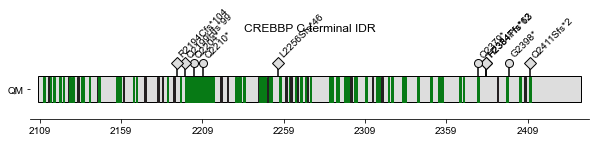

In [4]:
#myaa=['ED','K']
myaa=['QM']

myaalist='_'
for a in range(0,len(myaa)):
    subaa=myaa[a]
    for i in range(0,len(subaa)):
        myaalist=myaalist+subaa[i]+'_'

shift=0.03

currseq=crebbpidr9seq

## define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(len(currseq)*0.03,1+len(myaa)/2) # may need to change 0.05 to something smaller if using long IDRs

## Plot particular amino acids
for a in range(0,len(myaa)):

    #tmp=0
    tmp=a

    #ax.plot([0, len(currseq)+1],[tmp+1, tmp+1.8],color='grey')

    #add rectangle to plot for length of full sequence
    ax.add_patch(Rectangle((0, tmp+1), len(currseq), 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    # Add IDR features
    posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
    for i in posaa:
        ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))
    

    # Add mutations
    ## ! Make size relative to number of occurrences ! ##
    ## ! Make shape frame shift or nonsense ! ##
    for i in range(0,len(fromaanuminidr)):
        ax.plot([fromaanuminidr[i]+0.5,fromaanuminidr[i]+0.5],[tmp+1+0.8,tmp+1+1.2],'-',color='black')
        if muttypelist[i]=='Nonsense':
            ax.plot(fromaanuminidr[i]+0.5,tmp+1+1.2,'o',markerfacecolor='#dddddd',markeredgecolor='black',markersize=8+4*(mutnumoccur[i]-1))
        elif muttypelist[i]=='Frameshift':
            ax.plot(fromaanuminidr[i]+0.5,tmp+1+1.2,'D',markerfacecolor='#dddddd',markeredgecolor='black',markersize=8+4*(mutnumoccur[i]-1))
        plt.text(fromaanuminidr[i]+0.7,tmp+1+1.4,crebbpidr9drivermuts[i],rotation=45) 
        
ax.set_xlim([-5, len(currseq)+5])
#ax.set_xlim([50,150])
ax.set_ylim([0.5, tmp+3])
plt.yticks(np.arange(1+0.4,len(myaa)+1,1),myaa)
plt.xticks(np.arange(1,len(currseq),50),np.arange(idrpos[0],idrpos[1],50))
ax.spines[['left','right', 'top']].set_visible(False)
plt.title('CREBBP C-terminal IDR')

#whichsequnderscore=subgenes[whichseqpos].replace(": ", "_")
#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/CREBBP_IDR9_Q_M_mutations_full_protein_pos.pdf', transparent=True, bbox_inches = "tight")


VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQ
 
QLLQQQQQQQQQQQ
 
[[14]]


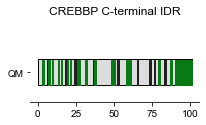

In [5]:
#myaa=['ED','K']
myaa=['QM']

myaalist='_'
for a in range(0,len(myaa)):
    subaa=myaa[a]
    for i in range(0,len(subaa)):
        myaalist=myaalist+subaa[i]+'_'

shift=0.03

currseq=crebbpidr2210term

## define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(len(currseq)*0.03,1+len(myaa)/2) # may need to change 0.05 to something smaller if using long IDRs

## Plot particular amino acids
for a in range(0,len(myaa)):

    #tmp=0
    tmp=a

    #ax.plot([0, len(currseq)+1],[tmp+1, tmp+1.8],color='grey')

    #add rectangle to plot for length of full sequence
    ax.add_patch(Rectangle((0, tmp+1), len(currseq), 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    # Add IDR features
    posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
    for i in posaa:
        ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))

ax.set_xlim([-5, len(currseq)+5])
#ax.set_xlim([50,150])
ax.set_ylim([0.5, tmp+3])
plt.yticks(np.arange(1+0.4,len(myaa)+1,1),myaa)
ax.spines[['left','right', 'top']].set_visible(False)
plt.title('CREBBP C-terminal IDR')

tmpseqs=[crebbpidr2210term]
numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

testaas=['Q']

xrichlen=[[] for _ in range(len(testaas))]

for s in range(0,len(tmpseqs)):
    currseq=tmpseqs[s]
    print(currseq)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in testaas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq
        print(' ')
        print(patchescombined)
        print(' ')

        xrichlen[counta].append(len(patchescombined))
        
print(xrichlen)

#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/CREBBP_IDR9_Q_M_mutations_Q2210ter.pdf', transparent=True, bbox_inches = "tight")


## 2.2 - Get number of Qs

VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQGHLGNPEQSAMLPQLNTPSRSALSSELSLVGDTTGDTLEKFVEGL
G2398*
VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQ
Q2379*
VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSP
Q2210*
VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYRE

([<matplotlib.axis.XTick at 0x1480f6bbdd90>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'G2398*'),
  Text(2, 0, 'Q2379*'),
  Text(3, 0, 'Q2210*'),
  Text(4, 0, 'Q2204*')])

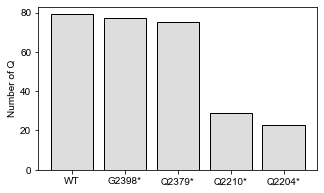

In [6]:
tmpseqnamelist=['WT']
tmpnumQ=[crebbpidr9seq.count('Q')]
tmpseqs=[crebbpidr9seq]
print(crebbpidr9seq)

for i in range(0,len(crebbpidr9drivermuts)):
    if muttypelist[i]=='Nonsense':
        tmpseqnamelist.append(crebbpidr9drivermuts[i])
        tmpseq=crebbpidr9seq[0:fromaanuminidr[i]]
        print(crebbpidr9drivermuts[i])
        print(tmpseq)
        tmpnumQ.append(tmpseq.count('Q'))
        tmpseqs.append(tmpseq)

dfnumQ=pd.DataFrame()
dfnumQ['Seq Name']=tmpseqnamelist
dfnumQ['Num Q']=tmpnumQ

dfnumQ=dfnumQ.sort_values(by='Num Q',ascending=False)
print(dfnumQ)

plt.figure(figsize=(5,3))
plt.bar(np.arange(0,len(tmpnumQ),1),dfnumQ['Num Q'].tolist(),edgecolor='black',facecolor='#dddddd')
plt.ylabel('Number of Q')
plt.xticks(np.arange(0,len(tmpnumQ),1),dfnumQ['Seq Name'].tolist())

#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/CREBBP_IDR9_numQ_all_nonsense.pdf', transparent=True, bbox_inches = "tight")


## 2.3 - Get length of cumulative Q patch

VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQGHLGNPEQSAMLPQLNTPSRSALSSELSLVGDTTGDTLEKFVEGL
 
QLLQQQQQQQQQQQQQQQQQQQFQQPQQQQQRMQQQMGQLGQMGQQQALQQQQQQMKQQ
 
VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQ
 
QLLQQQQQQQQQQQQQQQQQQQFQQPQQQQQRMQQQMGQLGQMGQQQALQQQQQQMKQQ
 
VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQ

([<matplotlib.axis.XTick at 0x1480f6ac9c10>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'G2398*'),
  Text(2, 0, 'Q2379*'),
  Text(3, 0, 'Q2210*'),
  Text(4, 0, 'Q2204*')])

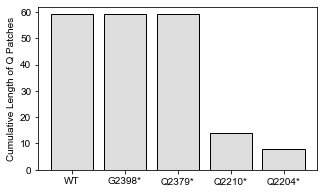

In [7]:
## MUST RUN 2.2 right before this ##
numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

testaas=['Q']

xrichlen=[[] for _ in range(len(testaas))]

for s in range(0,len(tmpseqs)):
    currseq=tmpseqs[s]
    print(currseq)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in testaas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq
        print(' ')
        print(patchescombined)
        print(' ')

        xrichlen[counta].append(len(patchescombined))
        
print(xrichlen)

dfnumQ=pd.DataFrame()
dfnumQ['Seq Name']=tmpseqnamelist
dfnumQ['Num Q']=xrichlen[0]

dfnumQ=dfnumQ.sort_values(by='Num Q',ascending=False)
print(dfnumQ)

plt.figure(figsize=(5,3))
plt.bar(np.arange(0,len(tmpnumQ),1),dfnumQ['Num Q'].tolist(),edgecolor='black',facecolor='#dddddd')
plt.ylabel('Cumulative Length of Q Patches')
plt.xticks(np.arange(0,len(tmpnumQ),1),dfnumQ['Seq Name'].tolist())

#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/CREBBP_IDR9_cumQ_all_nonsense.pdf', transparent=True, bbox_inches = "tight")


# Part 3: EP300 

## Part 3.1 - Load in IDR seqs, mutations, and visualize data

In [8]:
ep300fullseq='MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDELINSTELGLTNGGDINQLQTSLGMVQDAASKHKQLSELLRSGSSPNLNMGVGGPGQVMASQAQQSSPGLGLINSMVKSPMTQAGLTSPNMGMGTSGPNQGPTQSTGMMNSPVNQPAMGMNTGMNAGMNPGMLAAGNGQGIMPNQVMNGSIGAGRGRQNMQYPNPGMGSAGNLLTEPLQQGSPQMGGQTGLRGPQPLKMGMMNNPNPYGSPYTQNPGQQIGASGLGLQIQTKTVLSNNLSPFAMDKKAVPGGGMPNMGQQPAPQVQQPGLVTPVAQGMGSGAHTADPEKRKLIQQQLVLLLHAHKCQRREQANGEVRQCNLPHCRTMKNVLNHMTHCQSGKSCQVAHCASSRQIISHWKNCTRHDCPVCLPLKNAGDKRNQQPILTGAPVGLGNPSSLGVGQQSAPNLSTVSQIDPSSIERAYAALGLPYQVNQMPTQPQVQAKNQQNQQPGQSPQGMRPMSNMSASPMGVNGGVGVQTPSLLSDSMLHSAINSQNPMMSENASVPSLGPMPTAAQPSTTGIRKQWHEDITQDLRNHLVHKLVQAIFPTPDPAALKDRRMENLVAYARKVEGDMYESANNRAEYYHLLAEKIYKIQKELEEKRRTRLQKQNMLPNAAGMVPVSMNPGPNMGQPQPGMTSNGPLPDPSMIRGSVPNQMMPRITPQSGLNQFGQMSMAQPPIVPRQTPPLQHHGQLAQPGALNPPMGYGPRMQQPSNQGQFLPQTQFPSQGMNVTNIPLAPSSGQAPVSQAQMSSSSCPVNSPIMPPGSQGSHIHCPQLPQPALHQNSPSPVPSRTPTPHHTPPSIGAQQPPATTIPAPVPTPPAMPPGPQSQALHPPPRQTPTPPTTQLPQQVQPSLPAAPSADQPQQQPRSQQSTAASVPTPTAPLLPPQPATPLSQPAVSIEGQVSNPPSTSSTEVNSQAIAEKQPSQEVKMEAKMEVDQPEPADTQPEDISESKVEDCKMESTETEERSTELKTEIKEEEDQPSTSATQSSPAPGQSKKKIFKPEELRQALMPTLEALYRQDPESLPFRQPVDPQLLGIPDYFDIVKSPMDLSTIKRKLDTGQYQEPWQYVDDIWLMFNNAWLYNRKTSRVYKYCSKLSEVFEQEIDPVMQSLGYCCGRKLEFSPQTLCCYGKQLCTIPRDATYYSYQNRYHFCEKCFNEIQGESVSLGDDPSQPQTTINKEQFSKRKNDTLDPELFVECTECGRKMHQICVLHHEIIWPAGFVCDGCLKKSARTRKENKFSAKRLPSTRLGTFLENRVNDFLRRQNHPESGEVTVRVVHASDKTVEVKPGMKARFVDSGEMAESFPYRTKALFAFEEIDGVDLCFFGMHVQEYGSDCPPPNQRRVYISYLDSVHFFRPKCLRTAVYHEILIGYLEYVKKLGYTTGHIWACPPSEGDDYIFHCHPPDQKIPKPKRLQEWYKKMLDKAVSERIVHDYKDIFKQATEDRLTSAKELPYFEGDFWPNVLEESIKELEQEEEERKREENTSNESTDVTKGDSKNAKKKNNKKTSKNKSSLSRGNKKKPGMPNVSNDLSQKLYATMEKHKEVFFVIRLIAGPAANSLPPIVDPDPLIPCDLMDGRDAFLTLARDKHLEFSSLRRAQWSTMCMLVELHTQSQDRFVYTCNECKHHVETRWHCTVCEDYDLCITCYNTKNHDHKMEKLGLGLDDESNNQQAAATQSPGDSRRLSIQRCIQSLVHACQCRNANCSLPSCQKMKRVVQHTKGCKRKTNGGCPICKQLIALCCYHAKHCQENKCPVPFCLNIKQKLRQQQLQHRLQQAQMLRRRMASMQRTGVVGQQQGLPSPTPATPTTPTGQQPTTPQTPQPTSQPQPTPPNSMPPYLPRTQAAGPVSQGKAAGQVTPPTPPQTAQPPLPGPPPAAVEMAMQIQRAAETQRQMAHVQIFQRPIQHQMPPMTPMAPMGMNPPPMTRGPSGHLEPGMGPTGMQQQPPWSQGGLPQPQQLQSGMPRPAMMSVAQHGQPLNMAPQPGLGQVGISPLKPGTVSQQALQNLLRTLRSPSSPLQQQQVLSILHANPQLLAAFIKQRAAKYANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQMQQGNMGQIGQLPQALGAEAGASLQAYQQRLLQQQMGSPVQPNPMSPQQHMLPNQAQSPHLQGQQIPNSLSNQVRSPQPVPSPRPQSQPPHSSPSPRMQPQPSPHHVSPQTSSPHPGLVAAQANPMEQGHFASPDQNSMLSQLASNPGMANLHGASATDLGLSTDNSDLNSNLSQSTLDIH'
ep300idr11seq='ANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQMQQGNMGQIGQLPQALGAEAGASLQAYQQRLLQQQMGSPVQPNPMSPQQHMLPNQAQSPHLQGQQIPNSLSNQVRSPQPVPSPRPQSQPPHSSPSPRMQPQPSPHHVSPQTSSPHPGLVAAQANPMEQGHFASPDQNSMLSQLASNPGMANLHGASATDLGLSTDNSDLNSNLSQSTLDIH'

idrpos=[2093, 2414]

In [9]:
ep300df=pd.read_table('data/EP300_cBioPortal_Driver_Mutations.tsv')
ep300dfdriver=ep300df[ep300df['Annotation'].str.contains('OncoKB: Likely Oncogenic')]
ep300dfVUS=ep300df[ep300df['Annotation'].str.contains('OncoKB: Unknown')]
print(ep300dfdriver['Protein Change'].head(30))
print(ep300dfdriver['Protein Change'].tolist()[0:10])

print(ep300df.columns)
#print(ep300df[['Protein Change','Annotation','Custom Driver','Custom Driver Tiers','Start Pos','End Pos']])
#print(list(set(ep300df['Annotation'].tolist())))

ep300idr11drivermuts=ep300dfdriver['Protein Change'].tolist()[0:20]
print(ep300idr11drivermuts)

fromaa=[]
fromaanum=[]
fromaanuminidr=[]
muttypelist=[]
mutnumoccur=[]
uniep300idr11drivermuts=[]
count=-1
for i in range(0,len(ep300idr11drivermuts)):
    if ep300idr11drivermuts[i] not in uniep300idr11drivermuts:
        fromaa.append(ep300idr11drivermuts[i][0])
        fromaanum.append(int(ep300idr11drivermuts[i][1:5]))
        fromaanuminidr.append(int(ep300idr11drivermuts[i][1:5])-idrpos[0])
        if ep300idr11drivermuts[i][5]=='*':
            muttypelist.append('Nonsense')
        elif ep300idr11drivermuts[i][6:8]=='fs':
            muttypelist.append('Frameshift')
        mutnumoccur.append(1)
        count=count+1
        uniep300idr11drivermuts.append(ep300idr11drivermuts[i])
    else:
        mutnumoccur[count]=mutnumoccur[count]+1
    
print(len(muttypelist))
print(len(fromaa))
print(fromaa)
print(fromaanum)
print(fromaanuminidr)
print(mutnumoccur)

for i in range(0,len(fromaanuminidr)):
    print(ep300idr11seq[fromaanuminidr[i]])

3            S2400*
18      H2348Tfs*31
21      H2324Tfs*29
22      H2324Tfs*29
28      S2304Qfs*74
30           Q2298*
31           Q2288*
34      M2269Ifs*33
35           R2263*
36           R2263*
38           Q2258*
39           E2252*
40           E2252*
42           G2216*
44           Q2215*
49           R2185*
51      H2172Qfs*37
53           Q2167*
54       Q2151Sfs*7
61           Q2121*
71           Q2048*
101          C1771*
102          Q1766*
104    C1753Wfs*130
112          Q1719*
116          E1672*
117     Q1648Sfs*61
119     R1645Pfs*28
120          R1645*
121          R1645*
Name: Protein Change, dtype: object
['S2400*', 'H2348Tfs*31', 'H2324Tfs*29', 'H2324Tfs*29', 'S2304Qfs*74', 'Q2298*', 'Q2288*', 'M2269Ifs*33', 'R2263*', 'R2263*']
Index(['Study of Origin', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed',
       'Protein Change', 'Annotation', 'Custom Driver', 'Custom Driver Tiers',
       'Functional Impact', 'Mutation Type', 'Variant Type', 'Copy #',
       'CO

Text(0.5, 1.0, 'EP300 C-terminal IDR')

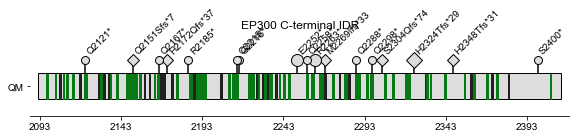

In [10]:
#myaa=['ED','K']
myaa=['QM']

myaalist='_'
for a in range(0,len(myaa)):
    subaa=myaa[a]
    for i in range(0,len(subaa)):
        myaalist=myaalist+subaa[i]+'_'

shift=0.03

currseq=ep300idr11seq

## define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(len(currseq)*0.03,1+len(myaa)/2) # may need to change 0.05 to something smaller if using long IDRs

## Plot particular amino acids
for a in range(0,len(myaa)):

    #tmp=0
    tmp=a

    #ax.plot([0, len(currseq)+1],[tmp+1, tmp+1.8],color='grey')

    #add rectangle to plot for length of full sequence
    ax.add_patch(Rectangle((0, tmp+1), len(currseq), 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    # Add IDR features
    posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
    for i in posaa:
        ax.add_patch(Rectangle((i, tmp+1+shift), 1, 0.8-2*shift, color=aacolor_map[currseq[i]]))
    

    # Add mutations
    ## ! Make size relative to number of occurrences ! ##
    ## ! Make shape frame shift or nonsense ! ##
    for i in range(0,len(fromaanuminidr)):
        ax.plot([fromaanuminidr[i]+0.5,fromaanuminidr[i]+0.5],[tmp+1+0.8,tmp+1+1.2],'-',color='black')
        if muttypelist[i]=='Nonsense':
            ax.plot(fromaanuminidr[i]+0.5,tmp+1+1.2,'o',markerfacecolor='#dddddd',markeredgecolor='black',markersize=8+4*(mutnumoccur[i]-1))
        elif muttypelist[i]=='Frameshift':
            ax.plot(fromaanuminidr[i]+0.5,tmp+1+1.2,'D',markerfacecolor='#dddddd',markeredgecolor='black',markersize=8+4*(mutnumoccur[i]-1))
        plt.text(fromaanuminidr[i]+0.7,tmp+1+1.4,uniep300idr11drivermuts[i],rotation=45) 
        
ax.set_xlim([-5, len(currseq)+5])
#ax.set_xlim([50,150])
ax.set_ylim([0.5, tmp+3])
plt.yticks(np.arange(1+0.4,len(myaa)+1,1),myaa)
plt.xticks(np.arange(1,len(currseq),50),np.arange(idrpos[0],idrpos[1],50))
ax.spines[['left','right', 'top']].set_visible(False)
plt.title('EP300 C-terminal IDR')

#whichsequnderscore=subgenes[whichseqpos].replace(": ", "_")
#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/EP300_IDR11_Q_M_mutations_full_protein_pos.pdf', transparent=True, bbox_inches = "tight")


## 3.2 - Get number of Ms

ANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQMQQGNMGQIGQLPQALGAEAGASLQAYQQRLLQQQMGSPVQPNPMSPQQHMLPNQAQSPHLQGQQIPNSLSNQVRSPQPVPSPRPQSQPPHSSPSPRMQPQPSPHHVSPQTSSPHPGLVAAQANPMEQGHFASPDQNSMLSQLASNPGMANLHGASATDLGLSTDNSDLNSNLSQSTLDIH
S2400*
ANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQMQQGNMGQIGQLPQALGAEAGASLQAYQQRLLQQQMGSPVQPNPMSPQQHMLPNQAQSPHLQGQQIPNSLSNQVRSPQPVPSPRPQSQPPHSSPSPRMQPQPSPHHVSPQTSSPHPGLVAAQANPMEQGHFASPDQNSMLSQLASNPGMANLHGASATDLGLSTDN
Q2298*
ANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQMQQGNMGQIGQLPQALGAEAGASLQAYQQRLLQQQMGSPVQPNPMSPQQHMLPNQAQSPHLQGQ
Q2288*
ANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQM

([<matplotlib.axis.XTick at 0x1480f6bc5f50>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'S2400*'),
  Text(2, 0, 'Q2298*'),
  Text(3, 0, 'Q2288*'),
  Text(4, 0, 'R2263*'),
  Text(5, 0, 'Q2258*'),
  Text(6, 0, 'E2252*'),
  Text(7, 0, 'G2216*'),
  Text(8, 0, 'Q2215*'),
  Text(9, 0, 'R2185*'),
  Text(10, 0, 'Q2167*'),
  Text(11, 0, 'Q2121*')])

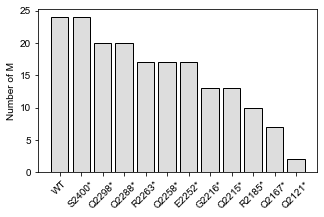

In [11]:
whichaa='M'
tmpseqnamelist=['WT']
tmpnumQ=[ep300idr11seq.count(whichaa)]
tmpseqs=[ep300idr11seq]
tmpfracQ=[ep300idr11seq.count(whichaa)/len(ep300idr11seq)]
print(ep300idr11seq)

for i in range(0,len(uniep300idr11drivermuts)):
    if muttypelist[i]=='Nonsense':
        tmpseqnamelist.append(uniep300idr11drivermuts[i])
        tmpseq=ep300idr11seq[0:fromaanuminidr[i]]
        print(uniep300idr11drivermuts[i])
        print(tmpseq)
        tmpnumQ.append(tmpseq.count(whichaa))
        tmpseqs.append(tmpseq)
        tmpfracQ.append(tmpseq.count(whichaa)/len(tmpseq))

dfnumQ=pd.DataFrame()
dfnumQ['Seq Name']=tmpseqnamelist
dfnumQ['Num '+whichaa]=tmpnumQ
dfnumQ['Frac '+whichaa]=tmpfracQ

dfnumQ=dfnumQ.sort_values(by='Num '+whichaa,ascending=False)
print(dfnumQ)

plt.figure(figsize=(5,3))
plt.bar(np.arange(0,len(tmpnumQ),1),dfnumQ['Num '+whichaa].tolist(),edgecolor='black',facecolor='#dddddd')
plt.ylabel('Number of '+whichaa)
plt.xticks(np.arange(0,len(tmpnumQ),1),dfnumQ['Seq Name'].tolist(),rotation=45)

#plt.savefig('exceptional_grammar_top_genes/figures/exceptional_grammar_specific_proteins/EP300_IDR11_numM_all_nonsense.pdf', transparent=True, bbox_inches = "tight")
